<a href="https://colab.research.google.com/github/ekaratnida/Automated_Tools-/blob/main/Module3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
from google.colab import auth
import os
import pandas as pd
import sqlite3 as sql

auth.authenticate_user()
os.chdir('/content/dataset/')

In [113]:
df = pd.read_csv('Supermarket.csv')
df.head()
conn = sql.connect("supermarket.db")
df.to_sql("table1", conn, if_exists='replace')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
sql_string = "select * from table1"
df = pd.read_sql(sql_string, conn)
df.head()

In [74]:
sql ='''
SELECT CUST_CODE, 
COUNT(DISTINCT BASKET_ID)/COUNT(DISTINCT SHOP_WEEK) AS VISIT_PER_WEEK,
COUNT(DISTINCT SHOP_WEEK) AS TOTAL_WEEK,
COUNT(DISTINCT PROD_CODE) AS TOTAL_PRODUCT,
SUM(SPEND) AS TOTAL_SALES
FROM table1
WHERE CUST_CODE IS NOT NULL GROUP BY CUST_CODE
HAVING TOTAL_SALES < 4000
'''
df = pd.read_sql(sql, conn)
df.tail()

,CUST_CODE,VISIT_PER_WEEK,TOTAL_WEEK,TOTAL_PRODUCT,TOTAL_SALES
551,CUST0000992117,1,1,1,0.53
552,CUST0000993845,1,1,1,8.29
553,CUST0000994026,1,1,2,2.51
554,CUST0000995942,1,1,1,1.40
555,CUST0000998609,1,7,8,11.82


In [64]:
x = df.iloc[:,1:-1]
x.head(5)

y = df.iloc[:,-1:]
y.head(5)

,TOTAL_SALES
0,9.68
1,9.72
2,3.27
3,2.76
4,5.52


In [65]:
import statsmodels.api as sm
x = sm.add_constant(x)
print(x)

     const  VISIT_PER_WEEK  TOTAL_WEEK  TOTAL_PRODUCT
0      1.0               1           4              8
1      1.0               1           1              4
2      1.0               1           2              3
3      1.0               1           1              1
4      1.0               1           1              1
..     ...             ...         ...            ...
551    1.0               1           1              1
552    1.0               1           1              1
553    1.0               1           1              2
554    1.0               1           1              1
555    1.0               1           7              8

[556 rows x 4 columns]


In [122]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [123]:
import statsmodels.api as sm

train_result = sm.OLS(y_train, x_train).fit()
train_result.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TOTAL_SALES   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     15.20
Date:                Wed, 12 May 2021   Prob (F-statistic):           1.99e-09
Time:                        08:31:18   Log-Likelihood:                -1871.8
No. Observations:                 444   AIC:                             3752.
Df Residuals:                     440   BIC:                             3768.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.4280      4.732      0.513      0.608      -6.872      11.728
VISIT_PER_WEEK    -2.6042      4.505     -0.578      0.563     -11.457       6.249
TOTAL_WEEK         0.8006      0.707      1.133      0.258      -0.588       2.190
TOTAL_PRODUCT      2.2179      0.490      4.528      0.000       1.255       3.181
==============================================================================
Omnibus:                      720.743   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           188258.050
Skew:                           9.371   Prob(JB):                         0.00
Kurtosis:                     102.120   Cond. No.                         35.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
train_result.params

const             2.854623
VISIT_PER_WEEK   -3.240218
TOTAL_WEEK        1.019019
TOTAL_PRODUCT     2.127331
dtype: float64

In [117]:
#train_result.predict([1, 1, 3, 5])
y_pred = train_result.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Mean squared error: 38.28


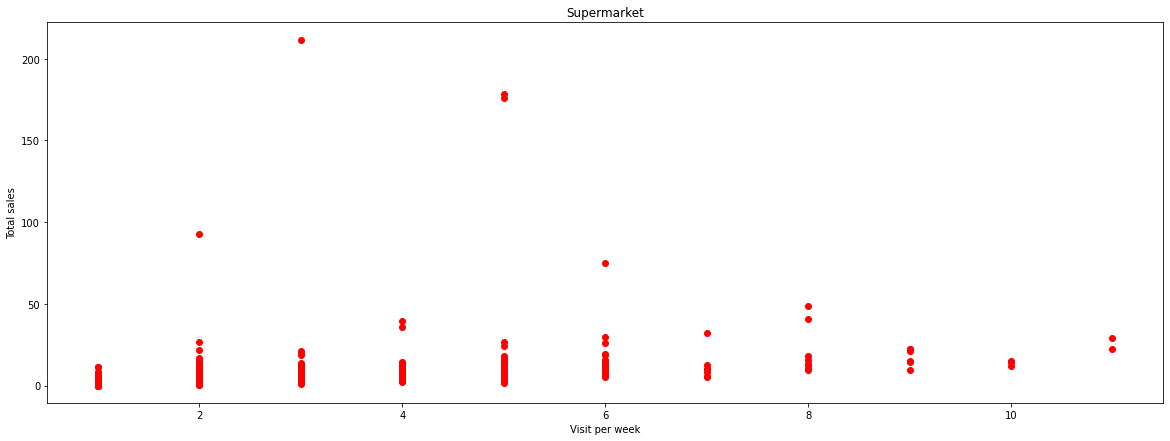

In [118]:
import matplotlib.pyplot as plt
import numpy as np

#print(x_train.iloc[:,3])
#print(y_train.shape)
plt.figure(figsize=(20,7))
plt.scatter(x_train.iloc[:,3], y_train, color = 'red')
#plt.plot(x_train.iloc[:,1:2], np.reshape(train_result.predict([1, 2, 5, 50]),(-1,1)), color = 'blue')
plt.title('Supermarket')
plt.xlabel('Visit per week')
plt.ylabel('Total sales')
plt.show()

In [121]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False).fit(x_train, y_train)
reg.score(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
print(reg.predict(np.array([[1, 1, 3, 5]])))


parameters = {}
clf = GridSearchCV(reg, parameters,cv=10)
clf.fit(x_train, y_train)
sorted(clf.cv_results_.keys())
y_pred = clf.predict(x_test)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('R2 score : %.2f'
      % r2_score(y_test, y_pred))


[[ 2.85462344 -3.24021778  1.01901873  2.12733144]]
0.0
[[13.30811905]]
Mean squared error: 37.02
R2 score : 0.10


In [120]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=2000,tol=0.0001)
reg.fit(x_train, y_train)
print(reg.predict(np.array([[1, 1, 3, 5]])))

[22.39103181]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
